<a href="https://colab.research.google.com/github/kiananasiri/Prodigy_ML_02/blob/main/Kmeans_Clustering_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
!gdown 19YMGFq66m_KkIksEUNyuRrXac3tSjnYc

Downloading...
From: https://drive.google.com/uc?id=19YMGFq66m_KkIksEUNyuRrXac3tSjnYc
To: /content/archive.zip
100% 1.58k/1.58k [00:00<00:00, 6.87MB/s]


In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Mall_Customers.csv      


In [4]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
data = data.drop(columns=['CustomerID'] , axis =1)

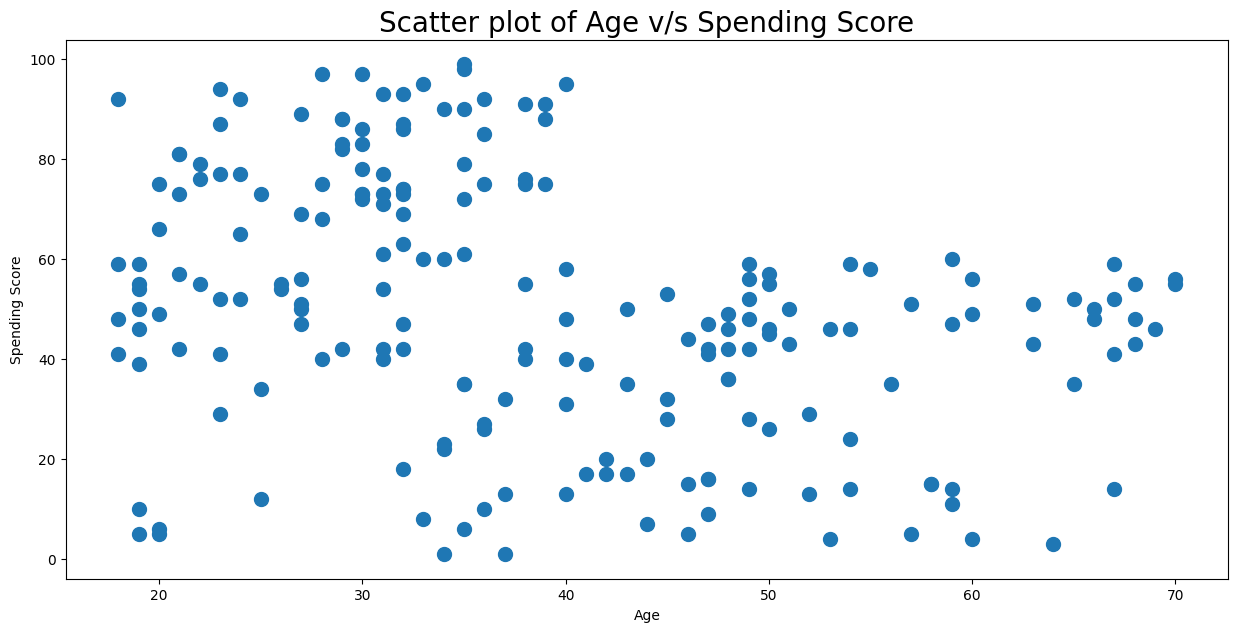

In [8]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(data['Age'] , data['Spending Score (1-100)'], s = 100)
plt.show()

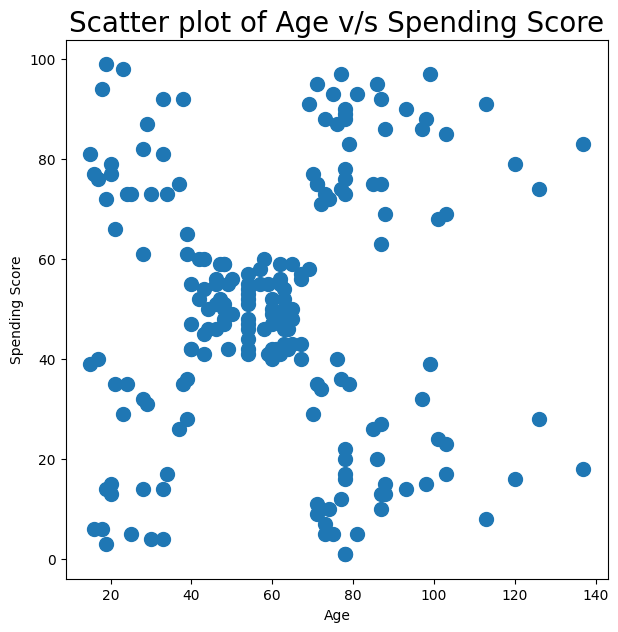

In [6]:
plt.figure(1 , figsize = (7 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(data['Annual Income (k$)'] , data['Spending Score (1-100)'], s = 100)
plt.show()

In [24]:
X = data.values
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
# selecting scaled age and spending score
inertia = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

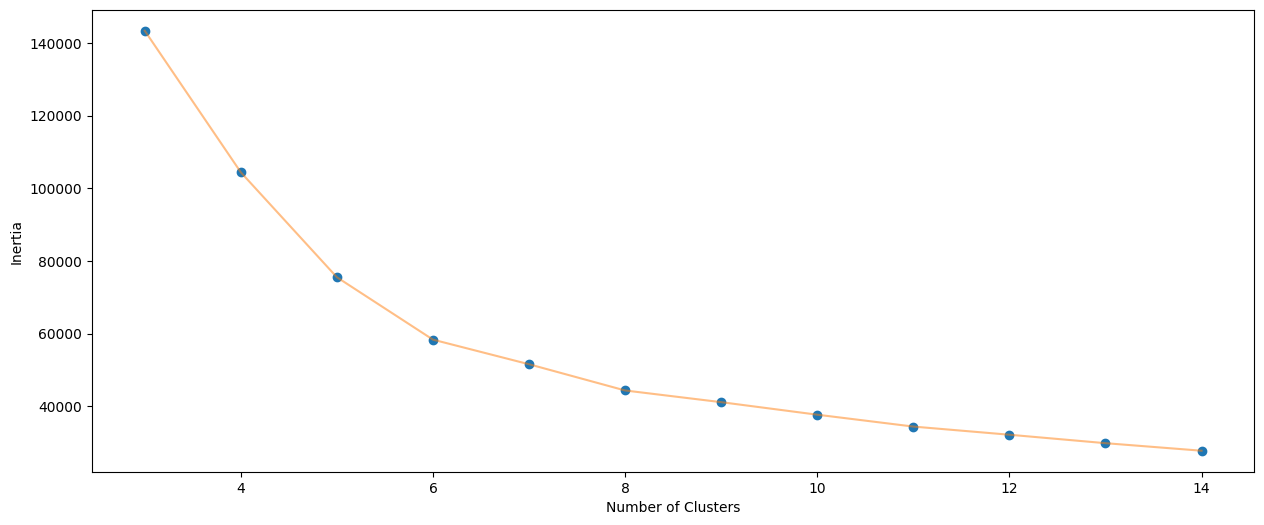

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3, 15) , inertia , 'o')
plt.plot(np.arange(3 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Accroding to L-bow graph a good choice for number clusters is 6.

In [31]:
inertia = []
model = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model.fit(X)
inertia.append(algorithm.inertia_)

In [32]:
model.cluster_centers_

array([[ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

6


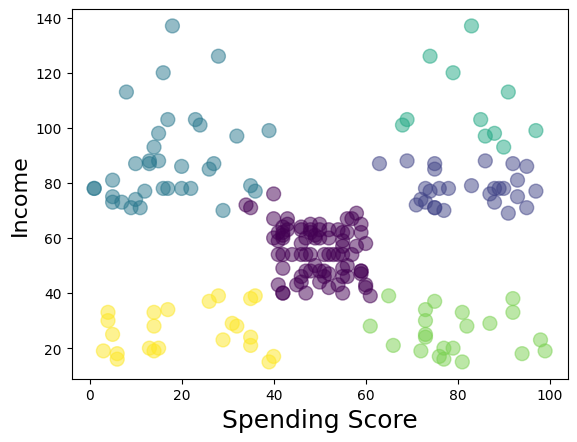

In [33]:
X3 = X[:, [3 , 2]]

model.fit(X3)
labels = model.labels_
print(len(set(labels)))
#area = np.pi * ( X[:, 1] )**2
plt.scatter(X[:, 3], X[:, 2], s=100, c=labels.astype(float), alpha=0.5)
plt.xlabel('Spending Score', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

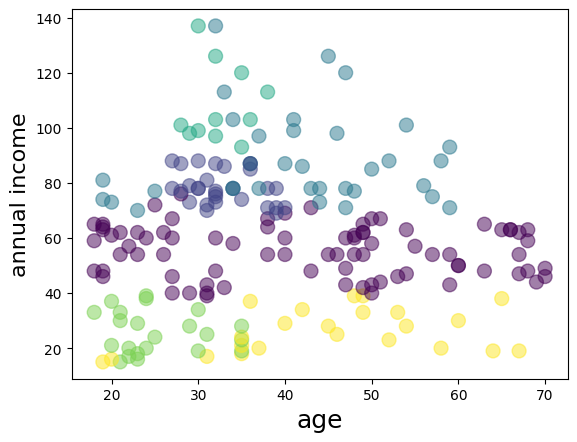

In [34]:
labels = model.labels_
#area = np.pi * ( X[:, 3] )**2
X1 = X[:, [1,2]]
model.fit(X1)
plt.scatter(X[:, 1], X[:, 2], s=100 , c=labels.astype(float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('annual income', fontsize=16)
plt.show()

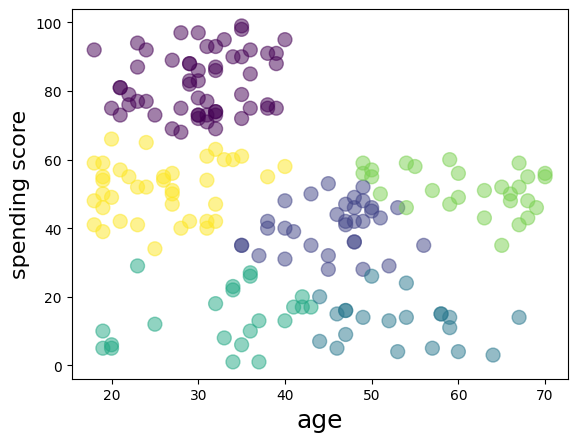

In [35]:
X2 = X[:, [1,3]]
model.fit(X2)
labels = model.labels_
plt.scatter(X[:, 1], X[:, 3], s=100 , c=labels.astype(float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('spending score', fontsize=16)
plt.show()

In [36]:
data['Cluster'] = model.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,5
